# XBeach profile evolution

Once your model finished running, it is time to have a look at the model netCDF outputs. XBeach generates a single NC file with all data in it. 

First we need to load the IPython libraries:

In [12]:
!pip install git+https://github.com/jakevdp/JSAnimation.git

  Cloning https://github.com/jakevdp/JSAnimation.git to /tmp/pip-L7MAMv-build


In [2]:
%pylab inline
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display

Populating the interactive namespace from numpy and matplotlib


# Running XBeach

To run **XBeach**, we need to go into the folder containing the input file `params.txt`. 

In this first example this is the folder `default`. We use the `!` to tell IPython that we want to execute the code in `bash` mode. Similar to running it from a linux terminal.

In [3]:
!pwd

/workspace/volume/lecture/GEOS3009/github/practicals/stormBeach1D/NourishmentCase


In [ ]:
!cd banquette/ ; xbeach

  **********************************************************
                     Welcome to XBeach
 
               version 1.23. XBeachX BETA release
               dateWed Jan 31 11:12:48 UTC 2018
     URL:
  **********************************************************
 
  Simulation started: YYYYMMDD    hh:mm:ss     time zone (UTC)
                      20180131  11:57:36     +0000
 
    running in:/workspace/volume/lecture/GEOS3009/github/practicals/stormBeach1D/NourishmentCase/banquette
  General Input Module
  Reading input parameters:
   XBeach reading fromparams.txt
  --------------------------------
  Backward compatibility:
                    instat =jons
  --------------------------------
  Physical processes:
                 wavemodel =surfbeat
                    cyclic =0 (no record found, default value used)
                     swave =1 (no record found, default value used)
                single_dir =0 (no record found, default value used)
                     lwave =

# Loading XBeach output

The netcdf file is located in the same location as your input files, we use the IPython netCDF4 functionality to load the data file. Using the `variables.keys()`, we can see all the parameters outputed by XBeach

In [6]:
nc_data = netCDF4.Dataset('banquette/xboutput.nc')
print nc_data.variables.keys()

[u'_parameters', u'globalx', u'globaly', u'globaltime', u'H', u'zs', u'zb', u'u', u'ccg']


To query the type/definition of each of the `netcdf` keys we can do:

In [7]:
nc_data.variables['H']

<type 'netCDF4._netCDF4.Variable'>
float64 H(globaltime, ny, nx)
    coordinates: globalx globaly
    units: m
    long_name: Hrms wave height based on instantaneous wave energy
    _FillValue: -3.4028234663852886e+38
unlimited dimensions: globaltime
current shape = (303, 1, 117)
filling off

# Get visualisation parameters

In [8]:
# Export the stored time values
times = nc_data.variables['globaltime'][:]

# Export the X-axis values of the profile
xprofile = nc_data.variables['globalx'][0,:]

# Export the bed elevation
bed_elev = nc_data.variables['zb'][:,0,:]

# Export the wave height
wave_height = nc_data.variables['H'][:,0,:]

# Export the water level
water_lvl = nc_data.variables['zs'][:,0,:]

## Check parameters shape

The shape of an array gives us the dimension of the dataset we are looking at:

In [9]:
print 'shape time values: ',times.shape
print 'shape X-axis profile: ',xprofile.shape
print 'shape bed elevation: ',bed_elev.shape
print 'shape wave height: ',wave_height.shape
print 'shape water level: ',water_lvl.shape

shape time values:  (303,)
shape X-axis profile:  (117,)
shape bed elevation:  (303, 117)
shape wave height:  (303, 117)
shape water level:  (303, 117)


# Plotting XBeach model at a given time

To plot the model result for a given time we can define a function that will handle the process automatically. To define a function in IPython we use the following keyword: `def`

In [10]:
# FID is the frame ID: an integer defining the time step we want to plot
def xbeach_frame(FID):
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(10,5), dpi=80) 
    axes = plt.gca()
    
    # Set extend of computational domain
    axes.set_xlim([0,int(xprofile.max())])
    axes.set_ylim([-25,20])

    # Define the base of the model
    base = np.zeros(len(xprofile[:]))
    base.fill(-25)
    
    # Define bed elevation for given frame ID
    bed = bed_elev[FID,:]
    ax1.plot(xprofile[:],bed,linewidth=2.0,color=[139./255.,131./255.,120./255.])
    ax1.fill_between(xprofile[:], base, bed, where=bed >= base, facecolor=[1.0,0.9,0.6], interpolate=True)

    # Define top water surface  
    sea = water_lvl[FID,:] + wave_height[FID,:]
    ax1.plot(xprofile[:],sea,linewidth=2.0,color=[0./255.,0./255.,128./255.])
    ax1.fill_between(xprofile[:], bed, sea, where= sea > bed, facecolor=[0.7,0.9,1.0], interpolate=True)

    # Axes definitions
    tlt='XBeach model time:'+str(int(times[FID]))+' s'
    plt.title(tlt, fontsize=12)
    ax1.set_ylabel('elevation [m]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    
    # Set legend
    names=['zb','H+zs']
    ax1.legend(names,loc='lower right', fontsize=11)
    plt.show()

Now we can simply call the function above for different time steps:

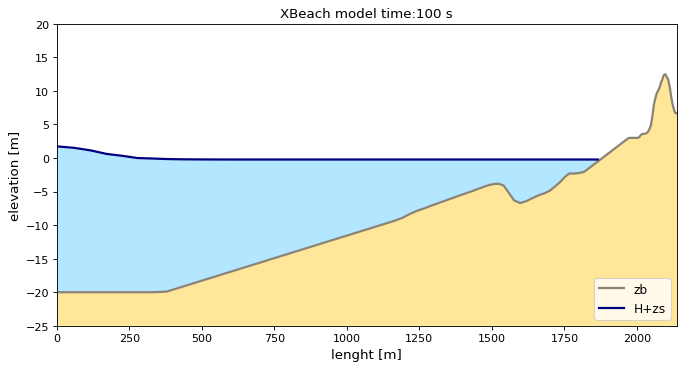

IndexError: index 2158 is out of bounds for axis 0 with size 303

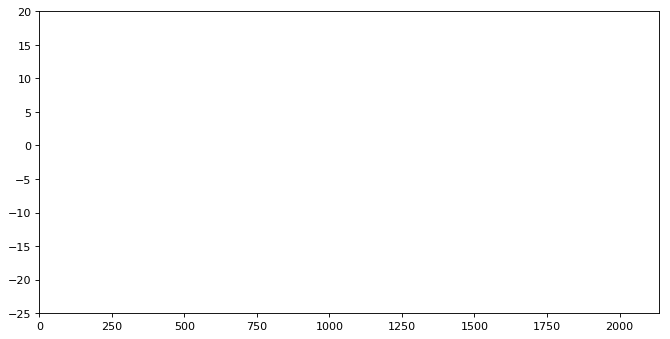

In [11]:
xbeach_frame(0)
xbeach_frame(2158)

# Making an animation of the results

To visualise an animation of the water and profile evolution over the duration of the model we can use the following cell

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(0, int(xprofile.max())), ylim=(-30, 20))
plt.title('XBeach model run', fontsize=12)
ax.set_ylabel('elevation [m]', fontsize=12)
ax.set_xlabel('lenght [m]', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
    
name = ['initial zb','zb','H+zs']

ax.plot(xprofile[:],bed_elev[0,:],'--', lw=1,color='k')

line1, = ax.plot([], [], lw=2,color=[139./255.,131./255.,120./255.] )
line2, = ax.plot([], [], lw=2,color=[0./255.,0./255.,128./255.])

# Initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2, 

base = -30.
top = np.zeros(len(xprofile[:]))
top.fill(20.)

# Animation function.  This is called sequentially
def animate(i):
    x = xprofile[:]
    f1 = bed_elev[i,:]
    sea = wave_height[i,:]+water_lvl[i,:]
    f2 = sea
    line1.set_data(x, f1)
    line2.set_data(x, f2)
    ax.fill_between(x, base, top, where= top > base, facecolor=[1.,1.,1.], interpolate=True)
    ax.fill_between(x, base, f1, where=f1 >= base, facecolor=[1.0,0.9,0.6], interpolate=True)
    ax.fill_between(x, f1, f2, where= f2 > f1, facecolor=[0.7,0.9,1.0], interpolate=True)
    ax.legend(name,loc='lower right', fontsize=9)
    return line1,line2 

# Call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init, frames=np.arange(0, times.shape[0]-1, 20), interval=200, blit=True)

# Analyze results

What we did so far is setting-up and running the model and visualizing the results. The visualization was limited to a plain representation of the model output. Often, it is necessary to obtain insight in the overall characteristics of the model results in wave propagation and erosion progression in terms of volumes or retreat distances. The following section describes a few simple tools to extract these characteristics from the model output.


# Beach profile

From the animation above we can see that some erosion/deposition is happening on the top of the profile. We will take a closer look at what is happening first

In [ ]:
# FID is the frame ID: an integer defining the time step we want to plot
def profile_frame(FID):
    
    names=[]
    
    # Number of profile to plot (start at 0)
    nbframe = len(FID)-1
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,7), dpi=80) 
    axes = plt.gca()
    
    # Set extend of visualisation domain
    axes.set_xlim([1200,int(xprofile.max())])
    axes.set_ylim([-12,16])

    # Define the base of the model
    base = np.zeros(len(xprofile[:]))
    base.fill(-12)
  
    # Define bed elevation for given frame ID
    for i in range(nbframe+1):
        bed = bed_elev[FID[i],:]
        if i == 0:
            ax1.plot(xprofile[:],bed,'--',linewidth=2.0,color='k')
            names.append('initial bed at '+str(int(times[FID[i]]))+'s')
        elif i<nbframe:
            ax1.plot(xprofile[:],bed,'--',linewidth=1.0,color='k')
            names.append('bed at time '+str(int(times[FID[i]]))+'s')
        else:
            ax1.plot(xprofile[:],bed,linewidth=2.0,color='k')
            names.append('final bed at '+str(int(times[FID[i]]))+'s')
            sea = water_lvl[FID[i],:]
            ax1.plot(xprofile[:],sea,linewidth=2.0,color=[0./255.,0./255.,128./255.])
            names.append('water level at '+str(int(times[FID[i]]))+'s')
            ax1.fill_between(xprofile[:], bed, sea, where= sea > bed, facecolor=[0.7,0.9,1.0], interpolate=True)
    
    ax1.fill_between(xprofile[:], base, bed, where=bed >= base, facecolor=[1.0,0.9,0.6], interpolate=True)

    # Axes definitions
    tlt='Zoom of profile evolution through time close to the shoreline'
    plt.title(tlt, fontsize=12)
    ax1.set_ylabel('elevation [m]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    
    # Set legend
    ax1.legend(names,loc='lower right', fontsize=11)
    plt.show()

In [ ]:
profile_frame([0,1200,2158])

# Hydrodynamics & sediment concentration

We will compute hydrodynamic parameters like RMS wave heights over a cross-section. The same is done for mean velocities and suspended concentration. 

In [ ]:
# Wave height rms
Hrms = np.mean(nc_data.variables['H'][:,0,:], axis=0)

# Water velocity
u = np.mean(nc_data.variables['u'][:,0,:], axis=0)

# Suspended concentration
conc = np.mean(nc_data.variables['ccg'][:,0,0,:], axis=0)

We define the series of plots that we will do in the next cell:

In [ ]:
def plot_average_HRMS():
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,3), dpi=80) 
    axes = plt.gca()
    
    # Set extend of computational domain
    axes.set_xlim([0,int(xprofile.max())])
    axes.set_ylim([-0.5,5])
    ax1.plot(xprofile[:],Hrms,linewidth=2.0)
    
    # Axes definitions
    ax1.set_ylabel('elevation [m]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    plt.grid()
    
    # Set legend
    names=['Hrms']
    ax1.legend(names,loc='lower left', fontsize=11)
    plt.show()
    
def plot_average_velocity():
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,3), dpi=80) 
    axes = plt.gca()
    
    # Set extend of computational domain
    axes.set_xlim([0,int(xprofile.max())])
    axes.set_ylim([-0.5,0.5])
    ax1.plot(xprofile[:],u,linewidth=2.0,color='g')
    
    # Axes definitions
    ax1.set_ylabel('velocity [m/s]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    plt.grid()
    
    # Set legend
    names=['water velocity']
    ax1.legend(names,loc='upper left', fontsize=11)
    plt.show()

def plot_average_susp_conc():
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,3), dpi=80) 
    axes = plt.gca()
    
    # Set extend of computational domain
    axes.set_xlim([0,int(xprofile.max())])
    axes.set_ylim([-0.0001,0.01])
    ax1.plot(xprofile[:],conc,linewidth=2.0,color='r')
    
    # Axes definitions
    ax1.set_ylabel('susp. conc. [m3/m3]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    plt.grid()
    
    # Set legend
    names=['depth-averaged suspended concentration for each sediment fraction']
    ax1.legend(names,loc='upper left', fontsize=11)
    plt.show()

We will not plot the dataset by calling the previously defined functions:

In [ ]:
plot_average_HRMS()
plot_average_velocity()
plot_average_susp_conc()

# Morphology

We do the same for plotting morphological evolution

In [ ]:
# Compute bed change
dx = xprofile[1]-xprofile[0]
bed = nc_data.variables['zb'][:,0,:]
Nbtime = len(bed[:,0])
zdiff = bed[Nbtime-1,:] - bed[0,:]

# Compute erosion, deposition over time
for t in range(1,Nbtime):
    diff = bed[t,:] - bed[t-1,:]
    
# Compute position of shoreline through time
pos0 = 0
shorepos = np.zeros(Nbtime)
zo = 0.
for t in range(0,Nbtime):
    up = np.where(bed[t,:]>=zo)[0]
    a = (bed[t,up[1]]-bed[t,up[1]-1])/(xprofile[up[1]]-xprofile[up[1]-1])
    b = bed[t,up[1]-1] - a * xprofile[up[1]-1]
    if t == 0:
        pos0 = (zo - b)/a 
        shorepos[0] = 0.
    else:
        shorepos[t] = (zo - b)/a - pos0

In [ ]:
def plot_morpho():
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,5), dpi=80) 
    axes = plt.gca()
    
    # Set extend of computational domain
    axes.set_xlim([1200,int(xprofile.max())])
    axes.set_ylim([min(zdiff)-0.25,max(zdiff)+0.25])
    ax1.plot(xprofile[:],zdiff,'-k',linewidth=3.0)
    ax1.fill_between(xprofile[:], zdiff, 0, where= zdiff > 0, 
                     facecolor=[204./255.,153./255.,255./255.], 
                     interpolate=True)
    
    ax1.fill_between(xprofile[:], zdiff, 0, where= zdiff < 0, 
                     facecolor=[0.7,0.9,1.0], interpolate=True)
    
    # Axes definitions
    ax1.set_ylabel('elevation change [m]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    plt.grid()
    
    # Set legend
    names=['elevation change']
    ax1.legend(names,loc='lower left', fontsize=11)
    plt.show()
    
def plot_shore():
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,5), dpi=80) 
    axes = plt.gca()
    # Set extend of computational domain
    axes.set_xlim([0,times.shape[0]])
    axes.set_ylim([min(shorepos)-0.5,max(shorepos)+0.5])
    ax1.plot(np.arange(0,times.shape[0]),shorepos,'-',linewidth=3.0,color='k')
    ax1.fill_between(np.arange(0,times.shape[0]), shorepos, 0, where= shorepos > 0, 
                     facecolor=[204./255.,153./255.,255./255.], interpolate=True)
    ax1.fill_between(np.arange(0,times.shape[0]), shorepos, 0, where= shorepos < 0, 
                     facecolor=[0.7,0.9,1.0], interpolate=True)
    
    # Axes definitions
    ax1.set_ylabel('shoreline position relative to initial condition [m]', fontsize=12)
    ax1.set_xlabel('time [step]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    plt.grid()
    
    # Set legend
    names=['shoreline position']
    ax1.legend(names,loc='upper right', fontsize=11)
    plt.show()

In [ ]:
plot_morpho()
plot_shore()